<a href="https://colab.research.google.com/github/der-himmel/obr-iz/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=9)
        self.pool = nn.MaxPool2d(kernel_size=4, stride=2)
        self.fc1 = nn.Linear(in_features=121, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))

        x = torch.flatten(x, 1)

        x = self.fc1(x)

        return x


net = SimpleConvNet()
print(net)

SimpleConvNet(
  (conv1): Conv2d(3, 1, kernel_size=(9, 9), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=121, out_features=10, bias=True)
)


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


net = BetterNet()
print(net)

BetterNet(
  (fc1): Linear(in_features=3072, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BetterConvNet(nn.Module):
    def __init__(self):
        super(ImprovedConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)  # 32 фильтра 3x3
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 64 фильтра 3x3
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)  # Dropout для предотвращения переобучения
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Увеличение количества нейронов
        self.fc2 = nn.Linear(512, 10)  # Выходной слой

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)  # Применение Dropout

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

net = BetterConvNet()
print(net)

In [19]:
example = torch.rand(1, 3, 32, 32)
net(example).shape
print(example)

tensor([[[[0.4423, 0.9187, 0.0619,  ..., 0.2886, 0.2942, 0.5359],
          [0.5419, 0.5213, 0.5999,  ..., 0.1261, 0.7447, 0.3363],
          [0.7134, 0.7640, 0.6113,  ..., 0.3683, 0.0028, 0.3152],
          ...,
          [0.0528, 0.1377, 0.7708,  ..., 0.4624, 0.8328, 0.9217],
          [0.5358, 0.1862, 0.6466,  ..., 0.7010, 0.8489, 0.3700],
          [0.4785, 0.4881, 0.2622,  ..., 0.4403, 0.4457, 0.6940]],

         [[0.2054, 0.9810, 0.5026,  ..., 0.6226, 0.8317, 0.9694],
          [0.4894, 0.7173, 0.0939,  ..., 0.5416, 0.4975, 0.4014],
          [0.6059, 0.9305, 0.2608,  ..., 0.5254, 0.8256, 0.1264],
          ...,
          [0.6001, 0.9985, 0.9984,  ..., 0.3852, 0.7577, 0.0197],
          [0.0097, 0.1605, 0.9494,  ..., 0.9021, 0.6626, 0.2029],
          [0.3655, 0.5563, 0.4425,  ..., 0.7558, 0.8673, 0.9849]],

         [[0.8847, 0.4294, 0.1391,  ..., 0.1384, 0.1729, 0.9962],
          [0.8827, 0.0072, 0.3515,  ..., 0.1265, 0.8359, 0.7929],
          [0.3427, 0.7348, 0.0932,  ..., 0

Выходная размерность тензора после сверточного слоя: 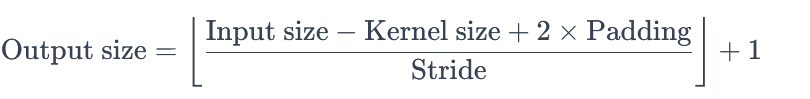

Выходная размерность тензора посте пулинга: 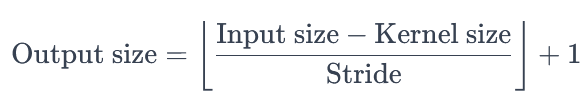

# Параметры обучения сети

In [20]:
NUMBER_OF_EPOCHS = 35
LR = 0.005

# Обучение сети

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

In [22]:
def calculate_metrics(loader, model):
    y_true = []
    y_pred = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, recall, precision, f1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=10000, shuffle=True)
valloader = DataLoader(valset, batch_size=10000, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9) #для SimpleConvNet
# optimizer = optim.Adam(net.parameters(), lr=0.005) #для BetterNet


for epoch in range(NUMBER_OF_EPOCHS):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}')

    train_acc, train_rec, train_prec, train_f1 = calculate_metrics(trainloader, net)
    print(f'Training - Accuracy: {train_acc}, Recall: {train_rec}, Precision: {train_prec}, F1 Score: {train_f1}')

    val_acc, val_rec, val_prec, val_f1 = calculate_metrics(valloader, net)
    print(f'Validation - Accuracy: {val_acc}, Recall: {val_rec}, Precision: {val_prec}, F1 Score: {val_f1}')

    if val_f1 >= 0.6:
        print("ВЫПОЛНЕНО")
        break

print('Finished training on spcified number of epochs')

Epoch 1, Loss: 2.309
Training - Accuracy: 0.13632, Recall: 0.13632, Precision: 0.1742511835908639, F1 Score: 0.06722740363018878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.1364, Recall: 0.1364, Precision: 0.12482353204355075, F1 Score: 0.06495442489062975
Epoch 2, Loss: 2.297
Training - Accuracy: 0.1446, Recall: 0.1446, Precision: 0.1340201074197223, F1 Score: 0.08225790248228756
Validation - Accuracy: 0.1465, Recall: 0.14650000000000002, Precision: 0.23331046134566985, F1 Score: 0.08289202065693435
Epoch 3, Loss: 2.280
Training - Accuracy: 0.15008, Recall: 0.15008, Precision: 0.13676231851763235, F1 Score: 0.09537264563898679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.1535, Recall: 0.1535, Precision: 0.13939148299950915, F1 Score: 0.09716734605966504
Epoch 4, Loss: 2.259
Training - Accuracy: 0.16196, Recall: 0.16196000000000002, Precision: 0.14675372157851388, F1 Score: 0.11116700814711164
Validation - Accuracy: 0.1628, Recall: 0.1628, Precision: 0.22927101126969865, F1 Score: 0.11140493779459071
Epoch 5, Loss: 2.238
Training - Accuracy: 0.1813, Recall: 0.1813, Precision: 0.1534831011230465, F1 Score: 0.12688838652480616
Validation - Accuracy: 0.1831, Recall: 0.18309999999999998, Precision: 0.2406560935277721, F1 Score: 0.12631760845943374
Epoch 6, Loss: 2.222
Training - Accuracy: 0.18408, Recall: 0.18407999999999997, Precision: 0.17172756826163388, F1 Score: 0.12551090280705557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.1907, Recall: 0.19069999999999998, Precision: 0.24437753533175283, F1 Score: 0.1273210827719007
Epoch 7, Loss: 2.208


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training - Accuracy: 0.1928, Recall: 0.1928, Precision: 0.16482738909472955, F1 Score: 0.13151095239372343


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.1969, Recall: 0.1969, Precision: 0.2465389321040885, F1 Score: 0.1330109012255215
Epoch 8, Loss: 2.195
Training - Accuracy: 0.2041, Recall: 0.2041, Precision: 0.15519575529506063, F1 Score: 0.14239249622828914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.2083, Recall: 0.2083, Precision: 0.21982799168664452, F1 Score: 0.14424336311213481
Epoch 9, Loss: 2.185


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training - Accuracy: 0.2115, Recall: 0.21150000000000002, Precision: 0.15575475316419404, F1 Score: 0.14903580300717384


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.2164, Recall: 0.2164, Precision: 0.2585683957784163, F1 Score: 0.1514997079665909
Epoch 10, Loss: 2.175
Training - Accuracy: 0.2159, Recall: 0.21590000000000004, Precision: 0.16168909315959895, F1 Score: 0.15264231774850856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.2216, Recall: 0.22160000000000002, Precision: 0.21185698404142173, F1 Score: 0.15630487336977272
Epoch 11, Loss: 2.167
Training - Accuracy: 0.21756, Recall: 0.21755999999999998, Precision: 0.18071800843653524, F1 Score: 0.15495550426214785


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation - Accuracy: 0.2227, Recall: 0.22269999999999998, Precision: 0.1896210766564965, F1 Score: 0.15813890900407668
Epoch 12, Loss: 2.160
Training - Accuracy: 0.21764, Recall: 0.21764, Precision: 0.1969869001081019, F1 Score: 0.15701979047313908
Validation - Accuracy: 0.2246, Recall: 0.22460000000000005, Precision: 0.19503773232170618, F1 Score: 0.1614358912405814
Epoch 13, Loss: 2.153
Training - Accuracy: 0.22056, Recall: 0.22056, Precision: 0.20324297228789945, F1 Score: 0.16280614395598053
Validation - Accuracy: 0.2258, Recall: 0.2258, Precision: 0.19386315675173832, F1 Score: 0.16507139012455102
Epoch 14, Loss: 2.147
Training - Accuracy: 0.22668, Recall: 0.22668, Precision: 0.20748255820845724, F1 Score: 0.1719133600562308
Validation - Accuracy: 0.2311, Recall: 0.2311, Precision: 0.19848682126829642, F1 Score: 0.17389350441352477
Epoch 15, Loss: 2.142
Training - Accuracy: 0.23196, Recall: 0.23196000000000003, Precision: 0.21353505010799329, F1 Score: 0.18035173072196004
Valida